**Imports**

In [30]:
# Third party
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import seaborn as sns

# Goggle
from goggle.GoggleModel import GoggleModel

# Synthcity
from synthcity.plugins.core.dataloader import GenericDataLoader

**Load data**

In [31]:
def preprocess_credit(df : pd.DataFrame) -> pd.DataFrame:

    replace = [
        ['A11', 'A12', 'A13', 'A14'],
        ['A30', 'A31','A32','A33','A34','A35'],
        ['A40','A41','A42','A43','A44','A45','A46','A47','A48','A49','A410'],
        ['A61','A62','A63','A64','A65'],
        ['A71','A72','A73','A74','A75'],
        ['A91','A92','A93','A94','A95'],
        ['A101','A102','A103'],
        ['A121','A122','A123','A124'],
        ['A141','A142','A143'],
        ['A151','A152','A153'],
        ['A171','A172','A173','A174'],
        ['A191','A192'],
        ['A201','A202']
    ]

    for row in replace:
        df = df.replace(row, range(len(row)))

    ind = list(range(len(df.columns)))

    ind = [x for x in ind if x != df.columns.get_loc('target')]
    col_list = df.columns[ind]

    ct = ColumnTransformer(
        [("scaler", StandardScaler(), col_list)], remainder="passthrough"
    )

    df = pd.DataFrame(ct.fit_transform(df),
                      index=df.index, columns=df.columns)

    return df


In [24]:
dataset = "credit"
names = [ 
    'status',
    'duration',
    'credit_history',
    'purpose',
    'credit_amount',
    'savings_account',
    'present_employment',
    'installment_rate',
    'personal_status',
    'other_debtors',
    'residence',
    'property',
    'age',
    'other_installment_plans',
    'housing',
    'number_of_existing_credits',
    'job',
    'liable_people',
    'telephone',
    'foreign_worker',
    'target'
]

X = pd.read_csv("../data/german.data", header=None, sep=' ', names=names)
X.head()

,status,duration,credit_history,purpose,credit_amount,savings_account,present_employment,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,number_of_existing_credits,job,liable_people,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [32]:
credit = preprocess_credit(X)
credit.head()


,status,duration,credit_history,purpose,credit_amount,savings_account,present_employment,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,number_of_existing_credits,job,liable_people,telephone,foreign_worker,target
0,-1.254566,-1.236478,1.344014,0.062704,-0.745131,1.833169,1.338078,0.918477,0.449326,-0.303686,...,-1.293723,2.766456,0.460831,0.133710,1.027079,0.146949,-0.428290,1.214598,-0.196014,1.0
1,-0.459026,2.248194,-0.503428,0.062704,0.949817,-0.699707,-0.317959,-0.870183,-0.963650,-0.303686,...,-1.293723,-1.191404,0.460831,0.133710,-0.704926,0.146949,-0.428290,-0.823318,-0.196014,2.0
2,1.132053,-0.738668,1.344014,1.156370,-0.416562,-0.699707,0.510060,-0.870183,0.449326,-0.303686,...,-1.293723,1.183312,0.460831,0.133710,-0.704926,-1.383771,2.334869,-0.823318,-0.196014,1.0
3,-1.254566,1.750384,-0.503428,-0.301852,1.634247,-0.699707,0.510060,-0.870183,0.449326,3.885083,...,-0.341055,0.831502,0.460831,2.016956,-0.704926,0.146949,2.334869,-0.823318,-0.196014,1.0
4,-1.254566,0.256953,0.420293,-1.030963,0.566664,-0.699707,-0.317959,0.024147,0.449326,-0.303686,...,1.564281,1.535122,0.460831,2.016956,1.027079,0.146949,2.334869,-0.823318,-0.196014,2.0


**Fit model**

In [42]:
X_train, X_test = train_test_split(credit, random_state=1, test_size=0.2, shuffle=True)

gen = GoggleModel(
    ds_name=dataset,
    input_dim=X_train.shape[1],
    encoder_dim=64,
    encoder_l=2,
    het_encoding=True,
    decoder_dim=64,
    decoder_l=2,
    threshold=0.1,
    decoder_arch="gcn",
    graph_prior=None,
    prior_mask=None,
    device="cpu",
    beta=0.1,
    learning_rate=0.01,
    seed=0,
)
gen.model

Goggle(
  (learned_graph): LearnedGraph(
    (act): Sigmoid()
    (threshold): Threshold(threshold=0.1, value=0)
  )
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Linear(in_features=21, out_features=64, bias=True)
      (1): ReLU()
    )
    (encode_mu): Linear(in_features=64, out_features=21, bias=True)
    (encode_logvar): Linear(in_features=64, out_features=21, bias=True)
  )
  (graph_processor): GraphInputProcessorHomo()
  (decoder): GraphDecoderHomo(
    (decoder): Sequential(
      (0): GraphConv(
        in=64, out=32, normalization=both
        (_activation): Tanh()
      )
      (1): GraphConv(in=32, out=1, normalization=both, activation=None)
    )
  )
)

In [43]:
gen.fit(X_train)

[Epoch 100/1000, patience  0] train: 16.475, val: 17.555
[Epoch 200/1000, patience  6] train: 16.157, val: 17.226
[Epoch 300/1000, patience 13] train: 15.324, val: 16.434
[Epoch 400/1000, patience  4] train: 14.703, val: 15.873
[Epoch 500/1000, patience 18] train: 14.205, val: 15.348
[Epoch 600/1000, patience  2] train: 13.743, val: 14.953
[Epoch 700/1000, patience  3] train: 13.230, val: 14.245
[Epoch 800/1000, patience  1] train: 11.895, val: 12.986
[Epoch 900/1000, patience  3] train: 10.753, val: 11.780
[Epoch 1000/1000, patience  0] train: 9.770, val: 10.583


**Evaluate synthetic data**

In [44]:
X_synth = gen.sample(X_test)
X_synth.head()

,status,duration,credit_history,purpose,credit_amount,savings_account,present_employment,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,number_of_existing_credits,job,liable_people,telephone,foreign_worker,target
0,1.132053,0.013637,0.420293,0.048228,0.592720,1.833169,1.338078,0.024147,0.449326,1.790699,...,0.611613,0.837382,0.460831,0.13371,-0.704926,0.146949,-0.42829,1.214598,-0.196014,1.0
1,-0.459026,0.488890,-0.503428,0.107306,-0.310006,-0.699707,-1.145978,0.024147,0.449326,-0.303686,...,0.611613,-1.603405,0.460831,0.13371,-0.704926,-1.383771,-0.42829,-0.823318,-0.196014,2.0
2,-0.459026,-0.320544,-0.503428,1.573140,-0.721694,-0.066488,-0.317959,0.918477,0.449326,-0.303686,...,-0.341055,0.222380,0.460831,0.13371,-0.704926,0.146949,-0.42829,1.214598,-0.196014,1.0
3,1.132053,-1.190087,0.420293,-0.982589,-1.045138,0.566731,0.510060,0.024147,0.449326,-0.303686,...,-0.341055,0.659740,0.460831,0.13371,1.027079,0.146949,-0.42829,-0.823318,-0.196014,1.0
4,0.336513,-0.223111,1.344014,0.559133,0.213614,-0.066488,0.510060,0.024147,0.449326,-0.303686,...,-0.341055,-0.106646,-0.957110,0.13371,1.027079,0.146949,-0.42829,1.214598,-0.196014,1.0


In [45]:
X_synth_loader = GenericDataLoader(
    X_synth,
    target_column='target',
)
X_test_loader = GenericDataLoader(
    X_test,
    target_column='target',
)

res = gen.evaluate_synthetic(X_synth_loader, X_test_loader)
print(f"Quality: {res[0]:.3f}")
print(f"Detection: {res[2]:.3f}")
print(
    f"Performance on real: {res[1][0]:.3f}, on synth: {res[1][1]:.3f}, diff: {(res[1][0] - res[1][1]):.3f}"
)

Quality: 0.507
Detection: 0.748
Performance on real: 0.627, on synth: 0.475, diff: 0.152


**Generate TSNE plots**

In [14]:
X_test["label"] = "Original"
X_synth["label"] = "Synthetic"

concat_df = pd.concat([X_test, X_synth], axis=0)
y_data = concat_df["label"]
x_data = concat_df.drop(["label", "target"], axis=1)

In [10]:
tsne = TSNE(n_components=2, verbose=0, random_state=0)
z = tsne.fit_transform(x_data)
df = pd.DataFrame()
df["y"] = y_data
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

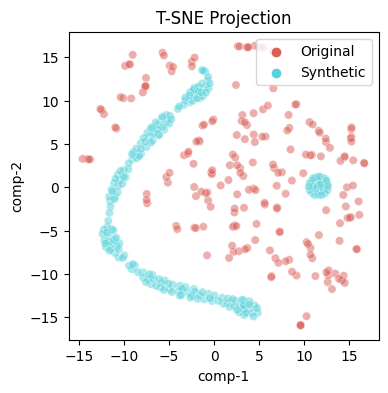

In [11]:
plt.figure(figsize=(4, 4))
sns.scatterplot(
    x="comp-1",
    y="comp-2",
    hue=df.y.tolist(),
    palette=sns.color_palette("hls", 2),
    alpha=0.5,
    data=df,
).set(title=f"T-SNE Projection")
plt.xlabel("comp-1")
plt.ylabel("comp-2")
plt.legend()

plt.show()

**Visualise adjacency matrix**

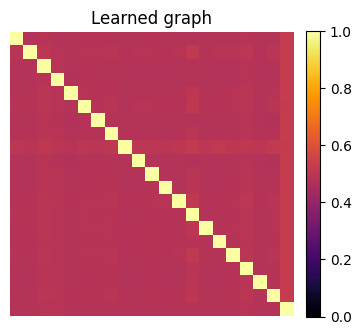

In [12]:
adj_matrix = gen.model.learned_graph(100).cpu().detach().numpy()
plt.figure(figsize=(4, 4))
im = plt.imshow(adj_matrix, cmap="inferno", interpolation="nearest", vmin=0, vmax=1.0)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title("Learned graph")
plt.axis("off")
plt.show()